# 2.1 张量（上）

## 什么是神经网络？
人工神经网络（英语：artificial neural network，ANNs）简称神经网络（neural network，NNs）或类神经网络，在机器学习和认知科学领域，是一种模仿生物神经网络（动物的中枢神经系统，特别是大脑）的结构和功能的数学模型或计算模型，用于对函数进行估计或近似。神经网络由大量的人工神经元联结进行计算。大多数情况下人工神经网络能在外界信息的基础上改变内部结构，是一种自适应系统，通俗地讲就是具备学习功能。现代神经网络是一种非线性统计性数据建模工具，神经网络通常是通过一个基于数学统计学类型的学习方法（learning method）得以优化，所以也是数学统计学方法的一种实际应用，通过统计学的标准数学方法我们能够得到大量的可以用函数来表达的局部结构空间，另一方面在人工智慧学的人工感知领域，我们通过数学统计学的应用可以来做人工感知方面的决定问题（也就是说通过统计学的方法，人工神经网络能够类似人一样具有简单的决定能力和简单的判断能力），这种方法比起正式的逻辑学推理演算更具有优势。（摘自维基百科）

其实神经网络的原理很简单，我们假设世界上的任何问题都可以通过一个特定的函数来获得这个函数的解，那么如果我们能把所有的问题都用数学建模的方式变成一个可解的问题，那么我们只要找到这样的一个函数，我们就能获得这个问题的解。而神经网络就是一种找到获得任何可建模任务的函数解的方式。

那么神经网络是如何做到的呢，因为我们不是数学课，所有我只会大概讲讲原理。

其实将任何一个函数用一个可解的形式表示其近似值是非常常见的，我们从小到大就学过很多中函数展开式，而神经网络只是一种类似的函数展开的近似解。

比如泰勒级数展开：

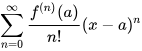

利用这个公式，我们可以获得很多其他函数的展开式，如果我们取这些函数的前几项，就是这个函数的近似值：
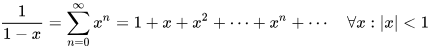
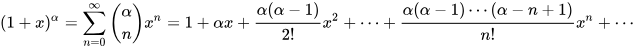

同理我们还有傅里叶变换（离散）：
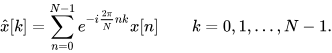

当然你也可以很轻松的在网上找到计算某个函数的傅里叶变换的习题，因为理论上说有周期函数都可以通过傅里叶变换转化成正弦函数和余弦函数的线性组合

在本章的最后，你能知道为什么神经网络也具有表示函数通解的能力

## 反向传播
反向传播是神将网络最最核心的算法，也是这个体系能够建设的原因，其本质是利用误差求函数各个参数进行求导，用来尽可能的修正误差的算法。在过去我们往往会使用函数值和真值的误差来修正参数，而选择的损失函数不同，对最后模型的精度和我们所关注解决的问题有着显著的影响。特别是2023.10月由法国的团队训练的Mistral 7B模型采用DPO（Direct Preference Optimization 直接偏好优化）作为损失函数，取得了比肩Meta开发的LLAMA 2 60B相当的性能，可见损失函数的选择至关重要。

## 梯度下降
梯度下降是实现反向传播的方法。我们通过链式法则，计算一个函数的局部极小值，如果实值函数F(x)在点a处可微且有定义，那么函数F(x)在a点沿着梯度相反方向下降速度最快，如果我们不停的去减掉这一点的梯度，我们最后就能得到局部最小值，而这个值就可以让我们的函数解近似于我们的真值。

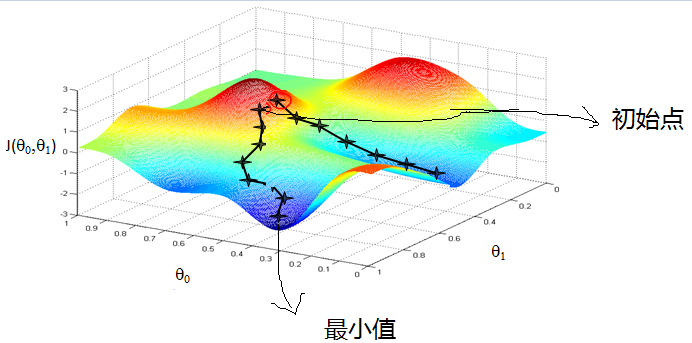

让我来举个简单的例子：
<br>假设我们有个待求解的函数F(x) = ax^2 + bx + c
而在这个函数上有点(1, -1), (0, -5), (2, 11)，现在我们需要用梯度下降算出这个函数的解析式：

我们先初始化函数F(x) = x^2 + x + 1（a,b,c都是随机的，可以先随机设置成1）


正如上文所提到的，我们需要确定一个损失函数，用来衡量计算解和真解的差别，然后来进行梯度计算，在这里我们采用均方差来计算误差值：

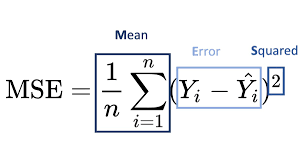

可以看出，这个公式非常的合理，因此对于给定的3个点，均方差公式的计算是：<br>
MSE = [(a+b+c+1)^2+(c+5)^2+(4a+2b+c-11)^2]/3

然后我们用MSE对a,b,c分别求偏导：<br>
∂MSE/∂a = [(a+b+c+1)+4*(4a+2b+c-11)]\*2/3<br>
∂MSE/∂b = [(a+b+c+1)+2*(4a+2b+c-11)]\*2/3<br>
∂MSE/∂c = [(a+b+c+1)+(c+5)+(4a+2b+c-11)]\*2/3<br>

而迭代公式是：<br>
a = a - α(∂MSE/∂a)<br>
b = b - α(∂MSE/∂b)<br>
c = c - α(∂MSE/∂c)

因为我们的a,b,c初始值是1,1,1，我们设步长为0.005，所以我们需要把这个值带入函数<br>
∂MSE/∂a = [(a+b+c+1)+4*(4a+2b+c-11)]\*2/3 = -8<br>
∂MSE/∂b = [(a+b+c+1)+2*(4a+2b+c-11)]\*2/3 = -8/3 <br>
∂MSE/∂c = [(a+b+c+1)+(c+5)+(4a+2b+c-11)]\*2/3 = -16/3<br>
a = a - (-8) * 0.001<br>
b = b - (-8/3) * 0.001<br>
c = c - (-16/3) * 0.001

现在让我们编写程序来重复上面的步骤，通过反复迭代计算a,b,c的值：

In [ ]:
a=b=c=1
for _ in range(10000):
    a = a - ((a+b+c+1)+4*(4*a+2*b+c-11))*2/3*0.005
    b = b - ((a+b+c+1)+2*(4*a+2*b+c-11))*2/3*0.005
    c = c - ((a+b+c+1)+(c+5)+(4*a+2*b+c-11))*2/3*0.005

def func(x):
    return a * x * x + b * x + c
# print(((a+b+c+1)+4*(4*a+2*b+c-11))*2)
# print(((a+b+c+1)+2*(4*a+2*b+c-11))*2)
# print(((a+b+c+1)+(c-5)+2*(4*a+2*b+c-11))*2)

In [ ]:
print(func(1))
print(func(0))
print(func(2))

现在，我们再用matplotlib绘制这个函数的图像

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.linspace(-2, 3, 100)
y_values = func(x_values)

plt.plot(x_values, y_values, label=f'F(x) = {a:.2f}x^2 + {b:.2f}x + {c:.2f}')
plt.scatter([1, 0, 2], [-1, -5, 11], color='red', label='Given Data Points')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Function F(x) after Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


可以看出，我们成功计算出了函数的解析式，这和我们的函数的已知值完美符合

我们的原始函数是：F(x) = 4x^2 - 5<br>
倘若我们在不知道它是个二阶函数的情况下，又该如何想办法得到函数的原始解析式呢？

可以看到我们的输入是一个数，输出也是一个数，所以我们假设由两层网络构成了函数的解析式，将原始输入乘上一个[1,5]的矩阵，通过线性变化再乘上一个[5,1]的矩阵，最后输出一个数，为了方便起见我们用向量表示：F(x) = (x*[w11,w12,w13...w15]T+[b11,b12,b13,b14,b15]T)*[w21,w22,w23...w25]T+b2<br>

我们来计算这个函数，对其进行化简：F(x) = [w11,w12,w13,w14,w15]\*[w21,w22,w23,w24,w25]T\*x+[b11,b12,b13,b14,b15]\*[w21,w22,w23,w24,w25]T+b2<br>然后我们再计算MSE，对每个可训练参数进行偏导计算，再进行迭代，这一次我们会把训练集扩大到100个

In [ ]:
def target_func(x):
    return 4*x*x - 5
training_data = [[i, target_func(i)] for i in range(-50, 50)]

观察F(x)可知，我们可以用A表示[w11,w12,w13,w14,w15]\*[w21,w22,w23,w24,w25]T，用B表示[b11,b12,b13,b14,b15]\*[w21,w22,w23,w24,w25]T+b2，那么原来的函数就会被化简为F(x) = Ax+B

而这样的函数无论如何都只能得到一个线性解，因为整个方程中，是不含非线性的成分的，而我们的待求的函数是一个非线性函数，实际上我们后面会学的很多问题，不论是物品识别，还是语音合成，图像生成甚至大语言模型，解都是非线性的，因此在这里我们需要引入非线性的部分：激活函数

## 激活函数
人工神经网络中节点的激活函数是计算节点输出的函数（基于其输入和单个输入的权重）。非线性的问题只能使用非线性激活函数来解决。当激活函数是非线性的时，可以证明两层神经网络是一个通用函数逼近器。这被称为普遍近似定理。当多层使用线性激活函数时，整个网络相当于一个单层模型。

有很多的函数都可以作为激活函数，因为激活函数只是用来提供非线性化的功能，选择激活函数更多需要考虑的是函数本身的特性，是否更符合我们的任务需求

### sigmoid激活函数
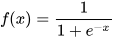

### tanh激活函数
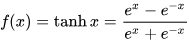

### ReLU激活函数
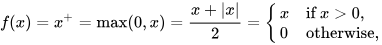

现在最流行的激活函数都是Relu函数的变体，实际上这个看似简单的激活函数是最晚被发现的，ReLu函数的优点显而易见，简单，易于理解和计算。

聪明的你应该已经发现现在的算式已经非常复杂，即使用Relu激活函数，对这16个待训练参数计算偏导也是极为复杂的，所以在下一节，我们将采用一种被成为动态图的神将网络实现，来计算这个模型的参数